In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn

In [2]:
archive_table = pd.read_csv('archive_table.csv')
game_table = pd.read_csv('game_table.csv')

In [3]:
archive_table.head()

,Time_format,Players,White,Black,Opponent,Opponent_rating,Points,Moves
0,10 min,kana2704 (1422) Tanzeel06 (1461),kana2704 (1422),Tanzeel06 (1461),kana2704,1422,0-1,43
1,10 min,Tanzeel06 (1454) gilsonbortolin (1455),Tanzeel06 (1454),gilsonbortolin (1455),gilsonbortolin,1455,0-1,31
2,10 min,Tanzeel06 (1462) YonT83 (1494),Tanzeel06 (1462),YonT83 (1494),YonT83,1494,0-1,51
3,10 min,kishna456 (1417) Tanzeel06 (1470),kishna456 (1417),Tanzeel06 (1470),kishna456,1417,0-1,27
4,10 min,IAS_Sarthak (1439) Tanzeel06 (1454),IAS_Sarthak (1439),Tanzeel06 (1454),IAS_Sarthak,1439,1-0,19


In [4]:
game_table.head()

,Game_id,Opponent,Opponent_rating,Result,By,Opening,Variation
0,80730671975,kishna456,1417,Won,by resignation,Sicilian Defense,"Open, Pelikán and Sveshnikov, Schlechter Vari..."
1,66957643771,SeparateCanoe,1310,Lost,by resignation,Nimzowitsch Defense Declined,NaN
2,67074568693,ALARECHA,1328,Lost,by checkmate,Philidor Defense,Exchange Variation
3,69593671255,oscarzaki99,1278,Won,by resignation,Italian Game,NaN
4,68315098163,rohdayrohdayrdoha,1289,Won,by resignation,Queen's Gambit Accepted,"Central Variation, Modern Defense"


### Check for Null values

In [5]:
archive_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Time_format      500 non-null    object
 1   Players          500 non-null    object
 2   White            500 non-null    object
 3   Black            500 non-null    object
 4   Opponent         500 non-null    object
 5   Opponent_rating  500 non-null    int64 
 6   Points           500 non-null    object
 7   Moves            500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
game_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game_id          500 non-null    int64 
 1   Opponent         500 non-null    object
 2   Opponent_rating  500 non-null    int64 
 3   Result           500 non-null    object
 4   By               500 non-null    object
 5   Opening          500 non-null    object
 6   Variation        379 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


Variation has some null values, but that is not much of concern

# Merging both the tables

Inner joining both the tables on Opponent column

In [7]:
table = pd.merge(archive_table,game_table,on=['Opponent','Opponent_rating'],how='inner')

In [8]:
table.head()

,Time_format,Players,White,Black,Opponent,Opponent_rating,Points,Moves,Game_id,Result,By,Opening,Variation
0,10 min,kana2704 (1422) Tanzeel06 (1461),kana2704 (1422),Tanzeel06 (1461),kana2704,1422,0-1,43,80912631031,Won,by resignation,Nimzowitsch-Larsen Attack,Modern Variation
1,10 min,Tanzeel06 (1454) gilsonbortolin (1455),Tanzeel06 (1454),gilsonbortolin (1455),gilsonbortolin,1455,0-1,31,80771638629,Lost,by resignation,Sicilian Defense,Old Sicilian Variation
2,10 min,Tanzeel06 (1462) YonT83 (1494),Tanzeel06 (1462),YonT83 (1494),YonT83,1494,0-1,51,80770945147,Lost,by resignation,Giuoco Piano Game,Four Knights Game
3,10 min,kishna456 (1417) Tanzeel06 (1470),kishna456 (1417),Tanzeel06 (1470),kishna456,1417,0-1,27,80730671975,Won,by resignation,Sicilian Defense,"Open, Pelikán and Sveshnikov, Schlechter Vari..."
4,10 min,IAS_Sarthak (1439) Tanzeel06 (1454),IAS_Sarthak (1439),Tanzeel06 (1454),IAS_Sarthak,1439,1-0,19,80654016843,Lost,by resignation,Closed Sicilian Defense,Grand Prix Attack


In [9]:
table.shape

(500, 13)

## Cleaning and rearranging the table

#### Making a column with 'My_rating'

In [10]:
table['My_id'] = table.apply(lambda row: row['White'] if 'Tanzeel06' in row['White']  else row['Black'], axis=1)

In [11]:
table.head()

,Time_format,Players,White,Black,Opponent,Opponent_rating,Points,Moves,Game_id,Result,By,Opening,Variation,My_id
0,10 min,kana2704 (1422) Tanzeel06 (1461),kana2704 (1422),Tanzeel06 (1461),kana2704,1422,0-1,43,80912631031,Won,by resignation,Nimzowitsch-Larsen Attack,Modern Variation,Tanzeel06 (1461)
1,10 min,Tanzeel06 (1454) gilsonbortolin (1455),Tanzeel06 (1454),gilsonbortolin (1455),gilsonbortolin,1455,0-1,31,80771638629,Lost,by resignation,Sicilian Defense,Old Sicilian Variation,Tanzeel06 (1454)
2,10 min,Tanzeel06 (1462) YonT83 (1494),Tanzeel06 (1462),YonT83 (1494),YonT83,1494,0-1,51,80770945147,Lost,by resignation,Giuoco Piano Game,Four Knights Game,Tanzeel06 (1462)
3,10 min,kishna456 (1417) Tanzeel06 (1470),kishna456 (1417),Tanzeel06 (1470),kishna456,1417,0-1,27,80730671975,Won,by resignation,Sicilian Defense,"Open, Pelikán and Sveshnikov, Schlechter Vari...",Tanzeel06 (1470)
4,10 min,IAS_Sarthak (1439) Tanzeel06 (1454),IAS_Sarthak (1439),Tanzeel06 (1454),IAS_Sarthak,1439,1-0,19,80654016843,Lost,by resignation,Closed Sicilian Defense,Grand Prix Attack,Tanzeel06 (1454)


In [12]:
table[['My_id','My_rating']] = table['My_id'].str.split(n=1,expand=True)

In [13]:
table['My_rating'] = table['My_rating'].str.replace(r'\(|\)', '').astype(int)

C:\Users\tanze\AppData\Local\Temp\ipykernel_23468\3187538026.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  table['My_rating'] = table['My_rating'].str.replace(r'\(|\)', '').astype(int)


In [14]:
table.drop('My_id',axis=1,inplace=True)

In [15]:
# Getting just usernames and removing the rating

table['White'] = table['White'].str.replace(r'\(\d+\)','')

table['White'] = table['White'].str.replace(' ', '')

table['Black'] = table['Black'].str.replace(r'\(\d+\)','')

table['Black'] = table['Black'].str.replace(' ', '')

C:\Users\tanze\AppData\Local\Temp\ipykernel_23468\3232191184.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  table['White'] = table['White'].str.replace(r'\(\d+\)','')
C:\Users\tanze\AppData\Local\Temp\ipykernel_23468\3232191184.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  table['Black'] = table['Black'].str.replace(r'\(\d+\)','')


In [16]:
table.head()

,Time_format,Players,White,Black,Opponent,Opponent_rating,Points,Moves,Game_id,Result,By,Opening,Variation,My_rating
0,10 min,kana2704 (1422) Tanzeel06 (1461),kana2704,Tanzeel06,kana2704,1422,0-1,43,80912631031,Won,by resignation,Nimzowitsch-Larsen Attack,Modern Variation,1461
1,10 min,Tanzeel06 (1454) gilsonbortolin (1455),Tanzeel06,gilsonbortolin,gilsonbortolin,1455,0-1,31,80771638629,Lost,by resignation,Sicilian Defense,Old Sicilian Variation,1454
2,10 min,Tanzeel06 (1462) YonT83 (1494),Tanzeel06,YonT83,YonT83,1494,0-1,51,80770945147,Lost,by resignation,Giuoco Piano Game,Four Knights Game,1462
3,10 min,kishna456 (1417) Tanzeel06 (1470),kishna456,Tanzeel06,kishna456,1417,0-1,27,80730671975,Won,by resignation,Sicilian Defense,"Open, Pelikán and Sveshnikov, Schlechter Vari...",1470
4,10 min,IAS_Sarthak (1439) Tanzeel06 (1454),IAS_Sarthak,Tanzeel06,IAS_Sarthak,1439,1-0,19,80654016843,Lost,by resignation,Closed Sicilian Defense,Grand Prix Attack,1454


In [17]:
table.columns

Index(['Time_format', 'Players', 'White', 'Black', 'Opponent',
       'Opponent_rating', 'Points', 'Moves', 'Game_id', 'Result', 'By',
       'Opening', 'Variation', 'My_rating'],
      dtype='object')

In [18]:
rearranged_cols = ['Game_id','Time_format', 'Players', 'White', 'Black','My_rating' ,'Opponent',
       'Opponent_rating', 'Points','Result', 'By', 'Moves',  
       'Opening', 'Variation']

table = table[rearranged_cols]

In [19]:
table.head()

,Game_id,Time_format,Players,White,Black,My_rating,Opponent,Opponent_rating,Points,Result,By,Moves,Opening,Variation
0,80912631031,10 min,kana2704 (1422) Tanzeel06 (1461),kana2704,Tanzeel06,1461,kana2704,1422,0-1,Won,by resignation,43,Nimzowitsch-Larsen Attack,Modern Variation
1,80771638629,10 min,Tanzeel06 (1454) gilsonbortolin (1455),Tanzeel06,gilsonbortolin,1454,gilsonbortolin,1455,0-1,Lost,by resignation,31,Sicilian Defense,Old Sicilian Variation
2,80770945147,10 min,Tanzeel06 (1462) YonT83 (1494),Tanzeel06,YonT83,1462,YonT83,1494,0-1,Lost,by resignation,51,Giuoco Piano Game,Four Knights Game
3,80730671975,10 min,kishna456 (1417) Tanzeel06 (1470),kishna456,Tanzeel06,1470,kishna456,1417,0-1,Won,by resignation,27,Sicilian Defense,"Open, Pelikán and Sveshnikov, Schlechter Vari..."
4,80654016843,10 min,IAS_Sarthak (1439) Tanzeel06 (1454),IAS_Sarthak,Tanzeel06,1454,IAS_Sarthak,1439,1-0,Lost,by resignation,19,Closed Sicilian Defense,Grand Prix Attack


In [20]:
test_table = table.copy()

In [21]:
# Defining Color Palette
white_piece_color = '#FFFFF0'
black_piece_color = '#1A2228'

font_size_suptitle = 30
font_size_title = 15
font_size_graph = 12

# Analysis

1. Number of times played as White and Black.
2. Wins/Draws/Loss as White and Black.
3. Most Frequent Opening as White/Black.
4. Best opening as White (Most wins with Opening).
5. Best Opening as Black (Most wins with Opening).
6. Average Opponent rating
7. Average opponent rating when won.
8. Average opponent rating when lost.
9. Average number of moves.
10. Quickest win.
11. Longest win.

## Number of times played as White and Black

In [22]:
table_played_as_white = table[table['White']=='Tanzeel06']
table_played_as_black = table[table['Black']=='Tanzeel06']

In [23]:
played_as_white = table_played_as_white.shape[0]
played_as_black = table_played_as_black.shape[0]

In [24]:
played_as_white,played_as_black

(247, 253)

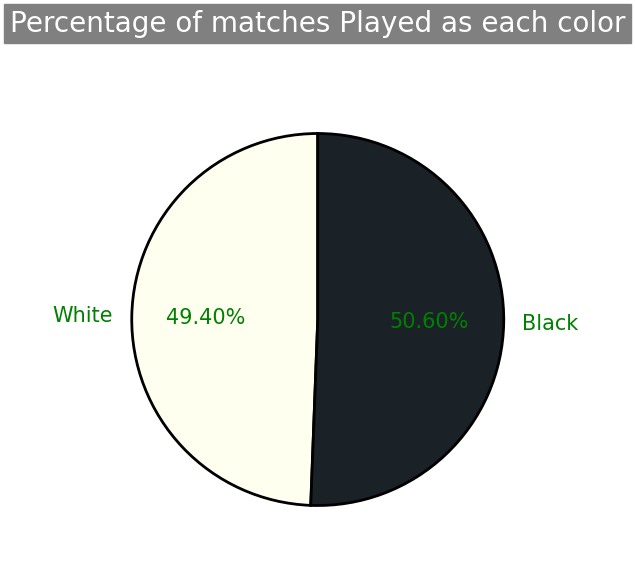

In [25]:
piece_label = ['White','Black']
matches_played = [played_as_white,played_as_black]
colors = [white_piece_color,black_piece_color]

fig = plt.figure()
ax = plt.axes()


fig.set_figheight(8)
fig.set_figwidth(6)

plt.pie(matches_played,labels=piece_label,
        autopct='%1.2f%%',
        colors = colors,
        startangle=90,
        textprops = {'color':'green',
                    'fontsize':15},
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})

plt.title('Percentage of matches Played as each color',fontsize=20,
          pad=40,color='white',backgroundcolor='grey')


plt.show()

## Wins/Draws/Loss colorwise

In [26]:
# Filtering out Wins

white_wins = table[(table['White']=='Tanzeel06') & (table['Result']=='Won')]['By'].value_counts()
black_wins = table[(table['Black']=='Tanzeel06') & (table['Result']=='Won')]['By'].value_counts()

# Filtering out Loss

white_loss = table[(table['White']=='Tanzeel06') & (table['Result']=='Lost')]['By'].value_counts()
black_loss = table[(table['Black']=='Tanzeel06') & (table['Result']=='Lost')]['By'].value_counts()

# Filtering out Draws

white_draw = table[(table['White']=='Tanzeel06') & (table['Result']=='Draw')]['By'].value_counts()
black_draw = table[(table['Black']=='Tanzeel06') & (table['Result']=='Draw')]['By'].value_counts()

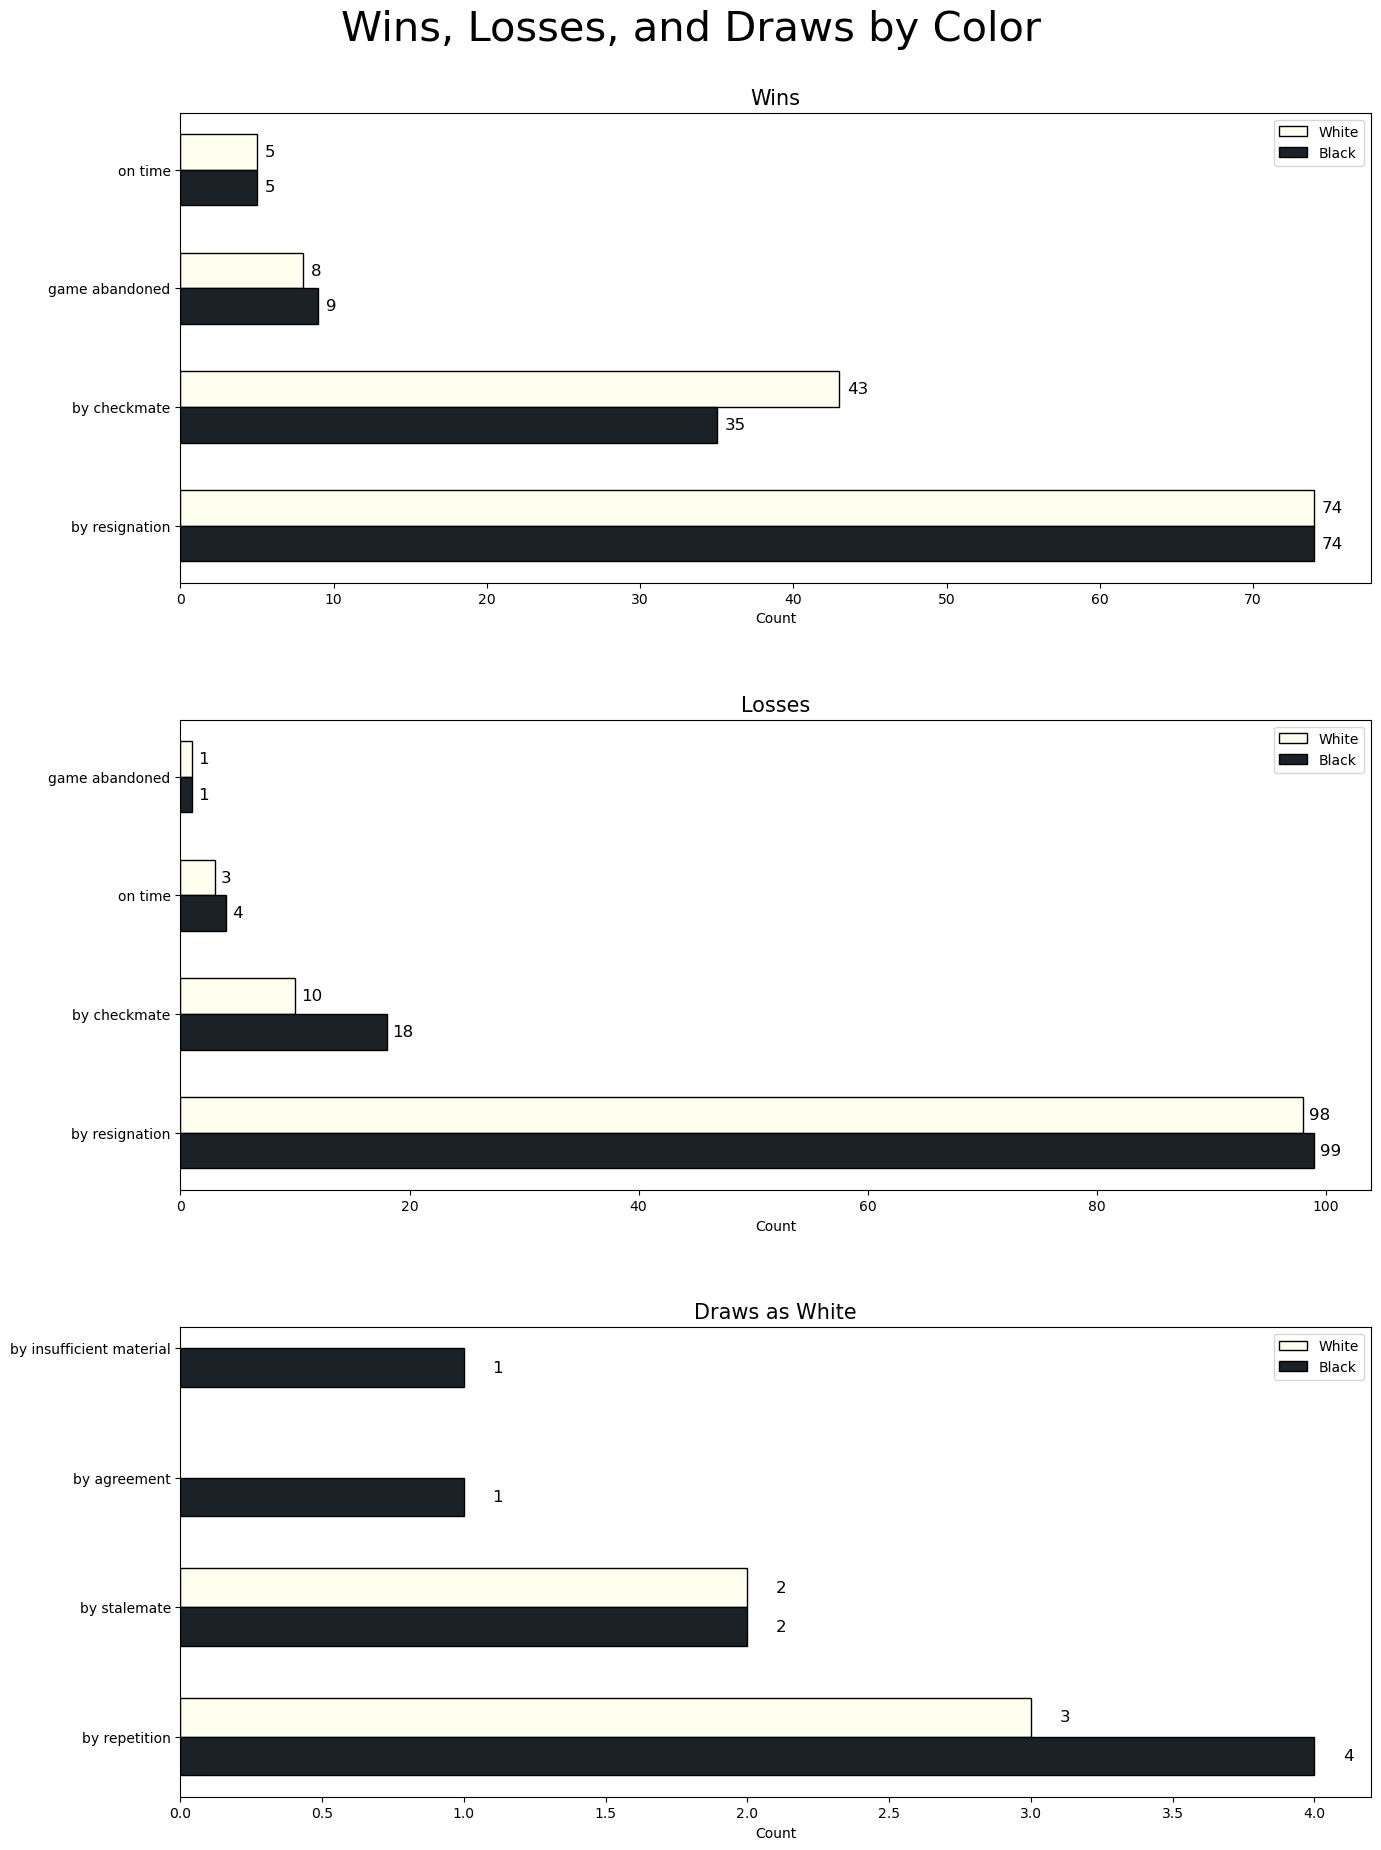

In [27]:
# Creating a figure with a grid of subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Set the overall title for the plot
fig.suptitle('Wins, Losses, and Draws by Color', fontsize=font_size_suptitle,y=0.95)

# Plotting the bars for wins
axs[0].set_title('Wins', fontsize=font_size_title)

# As White
bar_white = axs[0].barh(range(len(white_wins)), white_wins, label='White',
             align='edge', height=0.3, color=white_piece_color, edgecolor='black')
axs[0].set_xlabel('Count')
axs[0].set_yticks(range(len(white_wins)))
axs[0].set_yticklabels(list(white_wins.index))
axs[0].legend()

for bar in bar_white:
    width = bar.get_width()
    height = bar.get_height()
    axs[0].annotate(f'{int(width)}', xy=(width + 0.5, bar.get_y() + height/2),ha='left', va='center', fontsize=font_size_graph)

# As Black
bar_black = axs[0].barh(range(len(black_wins)), black_wins, label='Black',
             align='edge', height=-0.3, color=black_piece_color, edgecolor='black')
axs[0].set_xlabel('Count')
axs[0].set_yticks(range(len(black_wins)))
axs[0].set_yticklabels(list(black_wins.index))
axs[0].legend()

# Annotation
for bar in bar_black:
    width = bar.get_width()
    height = bar.get_height()
    axs[0].annotate(f'{int(width)}', xy=(width + 0.5, bar.get_y() + height/2),ha='left', va='center', fontsize=font_size_graph)



# Plotting the bars for losses
axs[1].set_title('Losses', fontsize=font_size_title)

# As white
bar_white = axs[1].barh(range(len(white_loss)), white_loss, label='White',
             align='edge', height=0.3, color=white_piece_color, edgecolor='black')
axs[1].set_xlabel('Count')
axs[1].set_yticks(range(len(white_loss)))
axs[1].set_yticklabels(list(white_loss.index))
axs[1].legend()

# Annotation
for bar in bar_white:
    width = bar.get_width()
    height = bar.get_height()
    axs[1].annotate(f'{int(width)}', xy=(width + 0.5, bar.get_y() + height/2),ha='left', va='center', fontsize=font_size_graph)


# As Black
bar_black = axs[1].barh(range(len(black_loss)), black_loss, label='Black',
             align='edge', height=-0.3, color=black_piece_color, edgecolor='black')
axs[1].set_xlabel('Count')
axs[1].set_yticks(range(len(black_loss)))
axs[1].set_yticklabels(list(black_loss.index))
axs[1].legend()

# Annotation
for bar in bar_black:
    width = bar.get_width()
    height = bar.get_height()
    axs[1].annotate(f'{int(width)}', xy=(width + 0.5, bar.get_y() + height/2),ha='left', va='center', fontsize=12)

    

# Plotting the bars for draws
axs[2].set_title('Draws as White', fontsize=font_size_title)

# As White
bar_white = axs[2].barh(range(len(white_draw)), white_draw, label='White',
             align='edge', height=0.3, color=white_piece_color, edgecolor='black')
axs[2].set_xlabel('Count')
axs[2].set_yticks(range(len(white_draw)))
axs[2].set_yticklabels(list(white_draw.index))
axs[2].legend()

# Annotation
for bar in bar_white:
    width = bar.get_width()
    height = bar.get_height()
    axs[2].annotate(f'{int(width)}', xy=(width+0.1, bar.get_y() + height/2),ha='left', va='center', fontsize=12)

# As Black
bar_black = axs[2].barh(range(len(black_draw)), black_draw, label='Black',
             align='edge', height=-0.3, color=black_piece_color, edgecolor='black')
axs[2].set_xlabel('Count')
axs[2].set_yticks(range(len(black_draw)))
axs[2].set_yticklabels(list(black_draw.index))
axs[2].legend()

# Annotation
for bar in bar_black:
    width = bar.get_width()
    height = bar.get_height()
    axs[2].annotate(f'{int(width)}', xy=(width+0.1, bar.get_y() + height/2),ha='left', va='center', fontsize=12)


plt.tight_layout(pad=5)  # Adjust the spacing between subplots
plt.show()


# Openings

## Most Frequent Openings

In [28]:
pd.DataFrame(table['Opening'].value_counts()).head(10)

,Opening
Sicilian Defense,58
Italian Game,54
Giuoco Piano Game,48
Scandinavian Defense,32
King's Pawn Opening,28
Bishop's Opening,27
Philidor Defense,24
Queen's Pawn Opening,23
Ruy López Opening,17
Indian Game,12


## Creating a DataFrame for Openings

In [ ]:
# Preparing the records (data)

openings = list(pd.DataFrame(table['Opening'].value_counts()).index)
records = []

for opening in openings:
    
    opening_count =  table[(table['Opening']==opening)]
    as_white = table[(table['Opening']==opening) & (table['White']=='Tanzeel06')]
    as_black = table[(table['Opening']==opening) & (table['Black']=='Tanzeel06')]
    white_wins = table[(table['Opening']==opening) & (table['White']=='Tanzeel06') & (table['Result']=='Won')]
    black_wins = table[(table['Opening']==opening) & (table['Black']=='Tanzeel06') & (table['Result']=='Won')]
    white_losses = table[(table['Opening']==opening) & (table['White']=='Tanzeel06') & (table['Result']=='Lost')]
    black_losses = table[(table['Opening']==opening) & (table['Black']=='Tanzeel06') & (table['Result']=='Lost')]
    white_draws = table[(table['Opening']==opening) & (table['White']=='Tanzeel06') & (table['Result']=='Draw')]
    black_draws = table[(table['Opening']==opening) & (table['Black']=='Tanzeel06') & (table['Result']=='Draw')]
    total_wins = table[(table['Opening']==opening) & (table['Result']=='Won')]
    total_losses = table[(table['Opening']==opening) & (table['Result']=='Lost')]
    total_draws = table[(table['Opening']==opening) & (table['Result']=='Draw')]
    
    records.append([opening,opening_count.shape[0],as_white.shape[0],as_black.shape[0],
                   white_wins.shape[0],black_wins.shape[0],
                   white_losses.shape[0],black_losses.shape[0],
                   white_draws.shape[0],black_draws.shape[0],
                   total_wins.shape[0],total_losses.shape[0],total_draws.shape[0]])
    


In [734]:
# Creating the DataFrame

headers = ['Opening','Count','As_white','As_black','White_wins','Black_wins',
        'White_losses','Black_losses','White_draws','Black_draws','Total_wins','Total_losses','Total_draws']

opening_record = pd.DataFrame(records,columns=headers)

In [735]:
# Sorting the DataFrame 
opening_record.sort_values(by='Count',ascending=False,inplace=True)

In [736]:
# Getting the top 10 Openings played

opening_record = opening_record.head(10)

In [737]:
opening_record

,Opening,Count,As_white,As_black,White_wins,Black_wins,White_losses,Black_losses,White_draws,Black_draws,Total_wins,Total_losses,Total_draws
1,Sicilian Defense,58,26,32,15,23,9,9,2,0,38,18,2
5,Italian Game,54,38,16,19,8,18,8,1,0,27,26,1
2,Giuoco Piano Game,48,32,16,17,5,15,10,0,1,22,25,1
15,Scandinavian Defense,32,21,11,14,6,7,5,0,0,20,12,0
4,King's Pawn Opening,28,13,15,7,4,6,9,0,2,11,15,2
11,Bishop's Opening,27,18,9,11,6,6,1,1,2,17,7,3
13,Philidor Defense,24,24,0,11,0,13,0,0,0,11,13,0
25,Queen's Pawn Opening,23,5,18,4,10,1,8,0,0,14,9,0
31,Ruy López Opening,17,4,13,2,7,2,6,0,0,9,8,0
7,Indian Game,12,2,10,1,5,1,5,0,0,6,6,0


## Most Played Openings

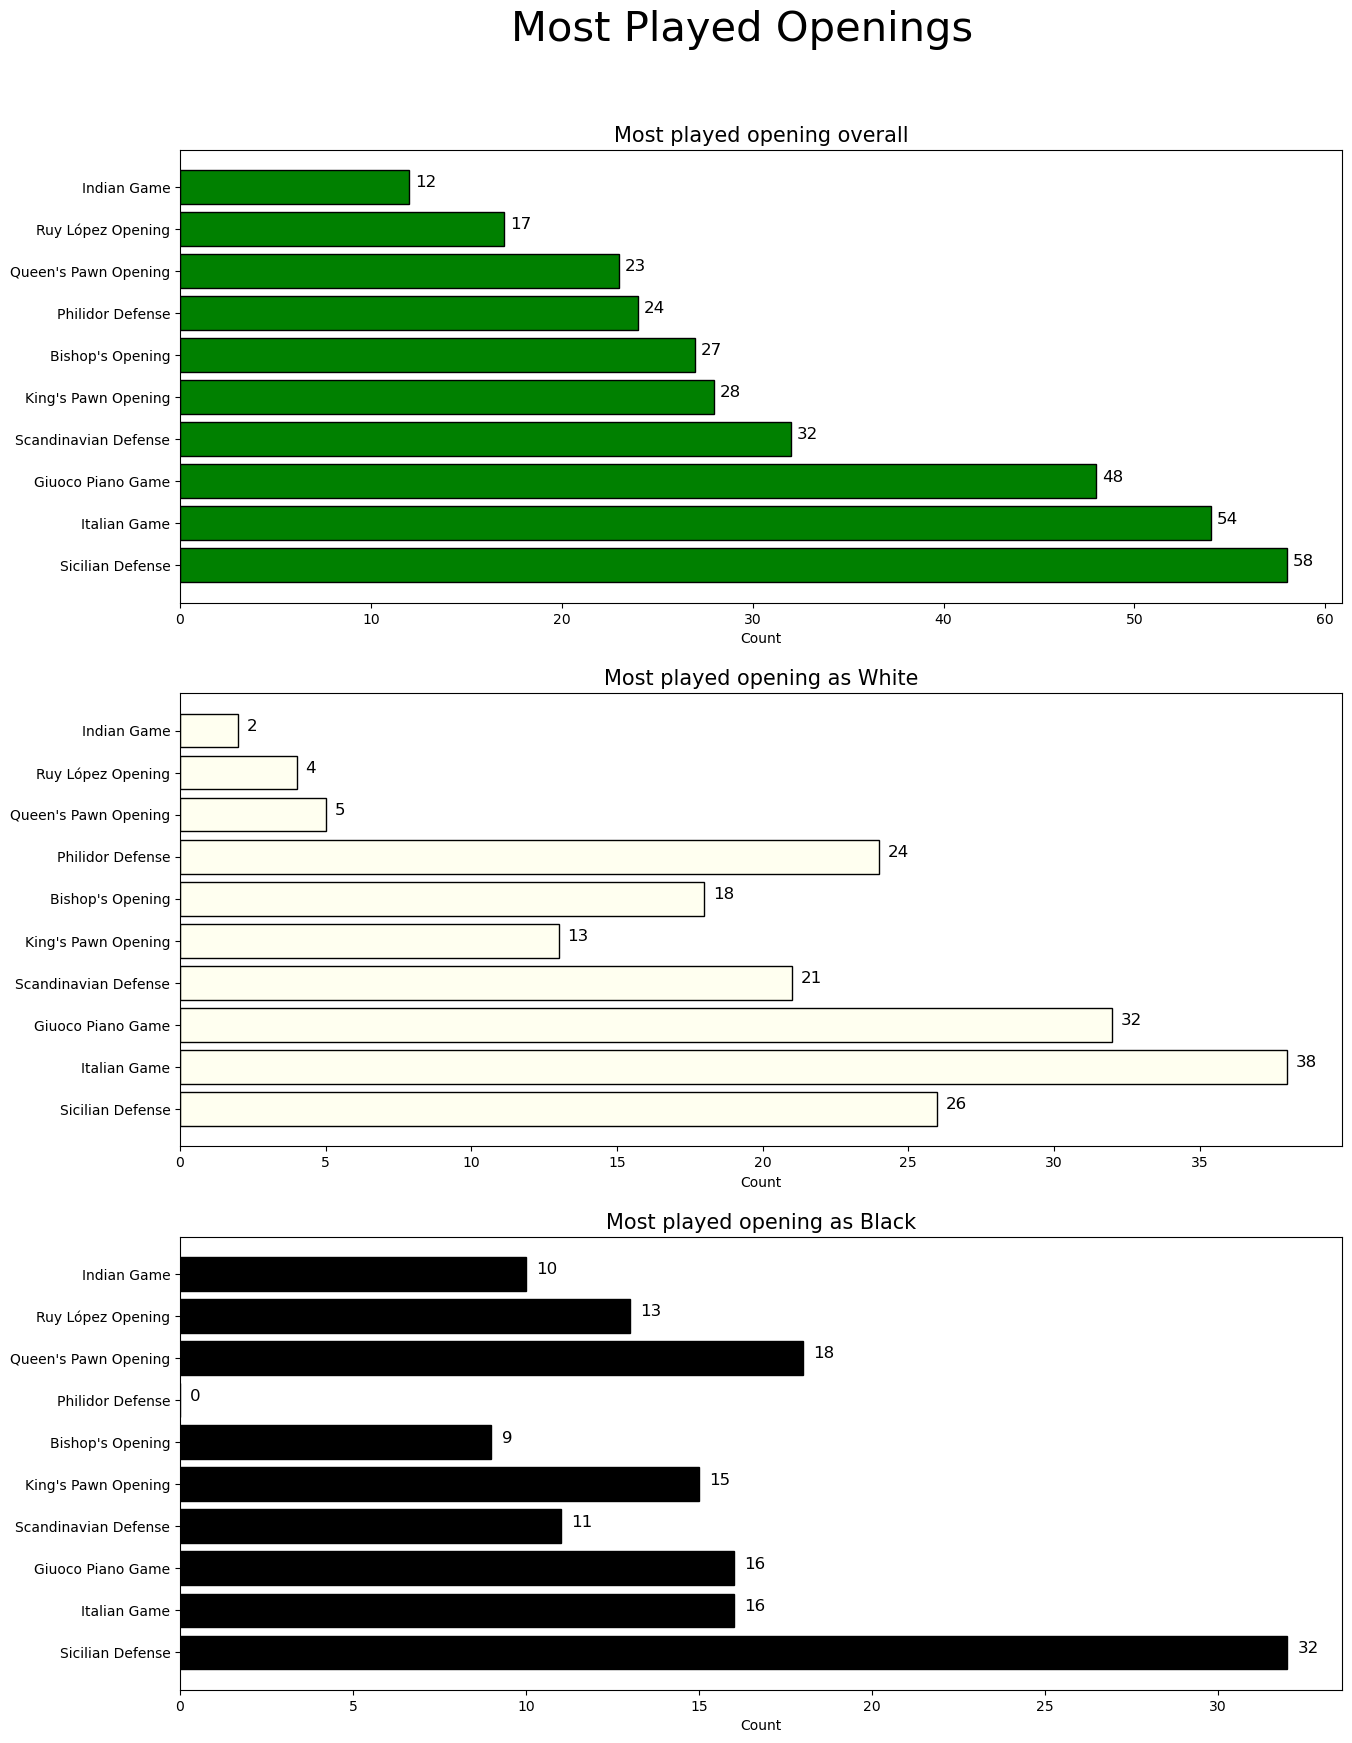

In [865]:
fig,ax = plt.subplots(3,1,figsize=(15,20))

# SUper Title
fig.suptitle('Most Played Openings',fontsize=font_size_suptitle,y=0.95)

# Graph for Overall

ax[0].set_title('Most played opening overall',fontsize=font_size_title)
bar_overall = ax[0].barh(opening_record['Opening'],opening_record['Count'],color='green',edgecolor='black')
ax[0].set_xlabel('Count')

for bar in bar_overall:
    width = bar.get_width()
    height = bar.get_height()
    ax[0].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    

# Graph for White

ax[1].set_title('Most played opening as White',fontsize=font_size_title)
bar_white = ax[1].barh(opening_record['Opening'],opening_record['As_white'],color='#FFFFF0',edgecolor='black')
ax[1].set_xlabel('Count')

for bar in bar_white:
    width = bar.get_width()
    height = bar.get_height()
    ax[1].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    
    
# Graph for Black

ax[2].set_title('Most played opening as Black',fontsize=font_size_title)
bar_black = ax[2].barh(opening_record['Opening'],opening_record['As_black'],color='black',edgecolor='black')
ax[2].set_xlabel('Count')

for bar in bar_black:
    width = bar.get_width()
    height = bar.get_height()
    ax[2].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)

## Successful Openings

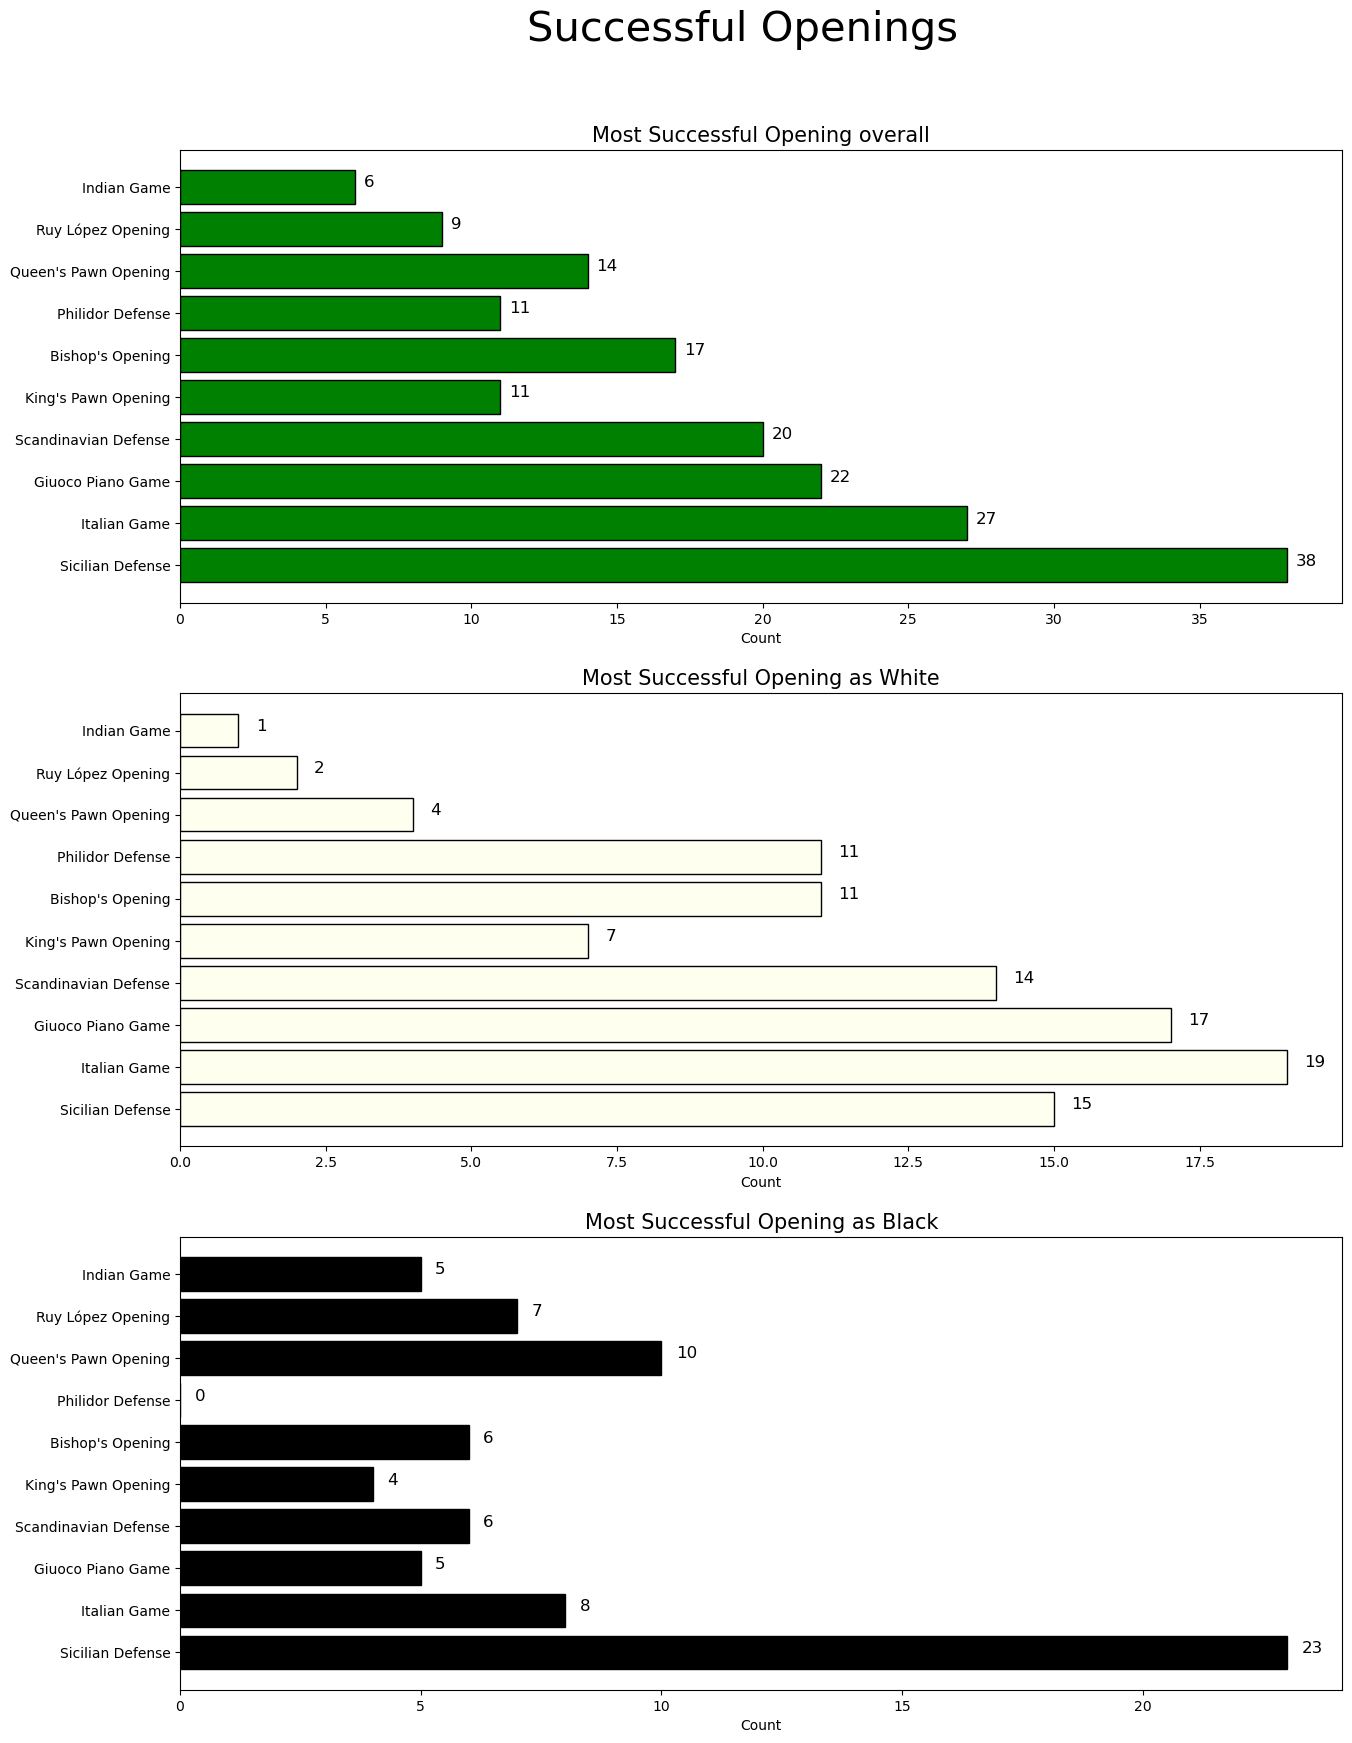

In [866]:
fig, ax = plt.subplots(3,1,figsize=(15,20))

fig.suptitle('Successful Openings',fontsize=font_size_suptitle,y=0.95)

# Overall Graph

ax[0].set_title('Most Successful Opening overall',fontsize=font_size_title)

bar_overall = ax[0].barh(opening_record['Opening'],opening_record['Total_wins'],label='Overall',
                        color='green',edgecolor='black')
ax[0].set_xlabel('Count')
ax[0].set_yticks(range(len(opening_record)))

for bar in bar_overall:
    width = bar.get_width()
    height = bar.get_height()
    ax[0].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    

# Graph for White

ax[1].set_title('Most Successful Opening as White',fontsize=font_size_title)

bar_white = ax[1].barh(opening_record['Opening'],opening_record['White_wins'],
                        color='#FFFFF0',edgecolor='black')
ax[1].set_xlabel('Count')
ax[1].set_yticks(range(len(opening_record)))

for bar in bar_white:
    width = bar.get_width()
    height = bar.get_height()
    ax[1].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    
    
# Graph for Black

ax[2].set_title('Most Successful Opening as Black',fontsize=font_size_title)

bar_black = ax[2].barh(opening_record['Opening'],opening_record['Black_wins'],
                        color='black',edgecolor='black')
ax[2].set_xlabel('Count')
ax[2].set_yticks(range(len(opening_record)))

for bar in bar_black:
    width = bar.get_width()
    height = bar.get_height()
    ax[2].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    
    

## Opening with Most Losses 

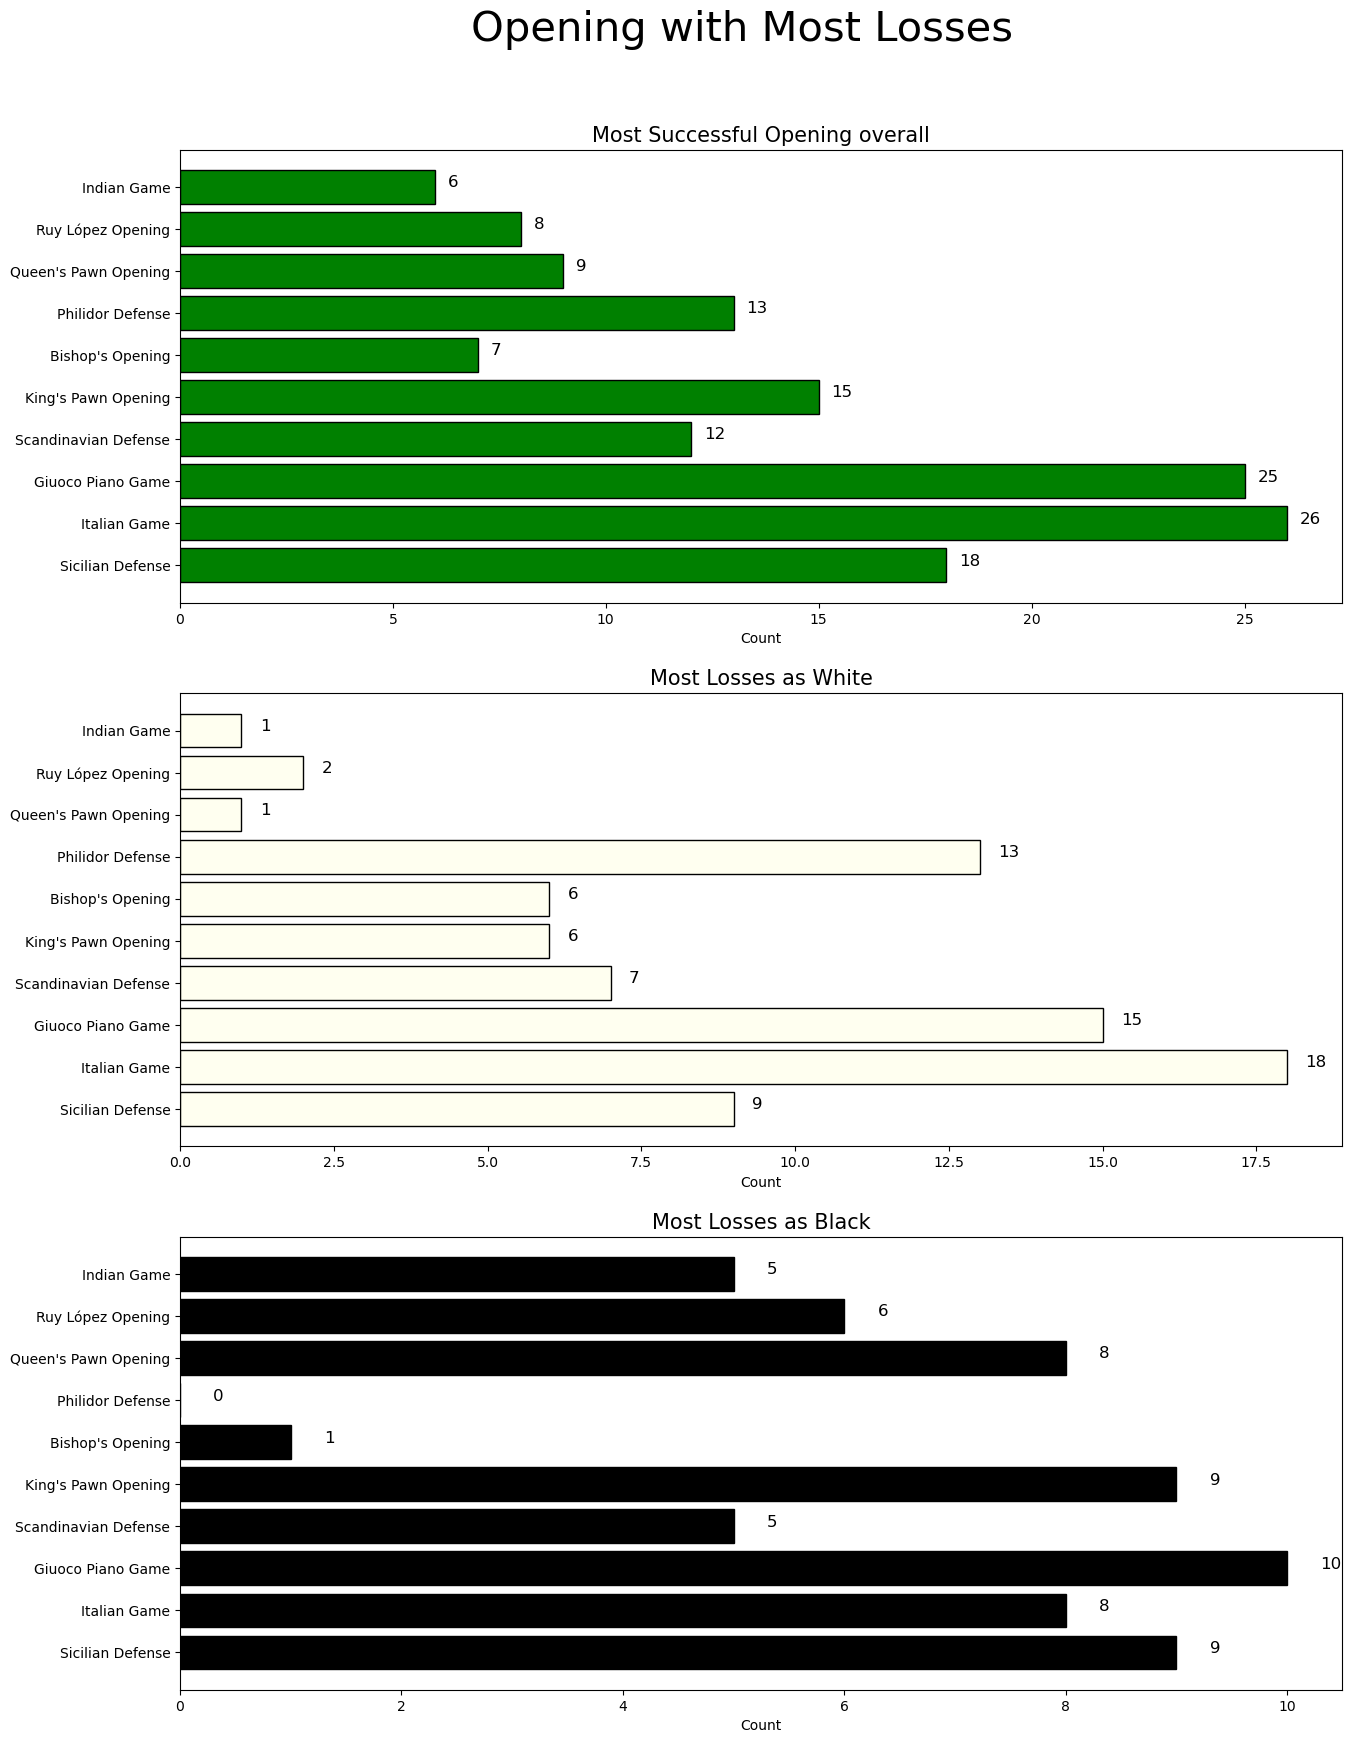

In [867]:
fig, ax = plt.subplots(3,1,figsize=(15,20))

fig.suptitle('Opening with Most Losses',fontsize=font_size_suptitle,y=0.95)


# Overall Graph

ax[0].set_title('Most Successful Opening overall',fontsize=font_size_title)

bar_overall = ax[0].barh(opening_record['Opening'],opening_record['Total_losses'],label='Overall',
                        color='green',edgecolor='black')
ax[0].set_xlabel('Count')
ax[0].set_yticks(range(len(opening_record)))

for bar in bar_overall:
    width = bar.get_width()
    height = bar.get_height()
    ax[0].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    

# Graph for White

ax[1].set_title('Most Losses as White',fontsize=font_size_title)

bar_white = ax[1].barh(opening_record['Opening'],opening_record['White_losses'],
                        color='#FFFFF0',edgecolor='black')
ax[1].set_xlabel('Count')
ax[1].set_yticks(range(len(opening_record)))

for bar in bar_white:
    width = bar.get_width()
    height = bar.get_height()
    ax[1].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    

# Graph for Black

ax[2].set_title('Most Losses as Black',fontsize=font_size_title)

bar_black = ax[2].barh(opening_record['Opening'],opening_record['Black_losses'],
                        color='black',edgecolor='black')
ax[2].set_xlabel('Count')
ax[2].set_yticks(range(len(opening_record)))

for bar in bar_black:
    width = bar.get_width()
    height = bar.get_height()
    ax[2].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    
    

## Adding Win percentage columns

In [754]:
opening_record['Win_percent_white'] = round((opening_record['White_wins']/opening_record['As_white'])*100,2)
opening_record['Win_percent_black'] = round((opening_record['Black_wins']/opening_record['As_black'])*100,2)
opening_record['Win_percent'] = round((opening_record['Total_wins']/opening_record['Count'])*100,2)

In [850]:
opening_record.iloc[:,-3:].head()

,Win_percent_white,Win_percent_black,Win_percent
1,57.69,71,65.52
5,50.00,50,50.00
2,53.12,31,45.83
15,66.67,54,62.50
4,53.85,26,39.29


In [786]:
opening_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 7
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Opening            10 non-null     object 
 1   Count              10 non-null     int64  
 2   As_white           10 non-null     int64  
 3   As_black           10 non-null     int64  
 4   White_wins         10 non-null     int64  
 5   Black_wins         10 non-null     int64  
 6   White_losses       10 non-null     int64  
 7   Black_losses       10 non-null     int64  
 8   White_draws        10 non-null     int64  
 9   Black_draws        10 non-null     int64  
 10  Total_wins         10 non-null     int64  
 11  Total_losses       10 non-null     int64  
 12  Total_draws        10 non-null     int64  
 13  Win_percent_white  10 non-null     float64
 14  Win_percent_black  10 non-null     int32  
 15  Win_percent        10 non-null     float64
dtypes: float64(2), int32(1), int6

In [784]:
opening_record['Win_percent_black'] = opening_record['Win_percent_black'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

In [859]:
# Filtering out the Openings played more than 25 times

min_games_played = 25
best_opening = opening_record[opening_record["Count"]>min_games_played]

## Openings with best winning percentage 

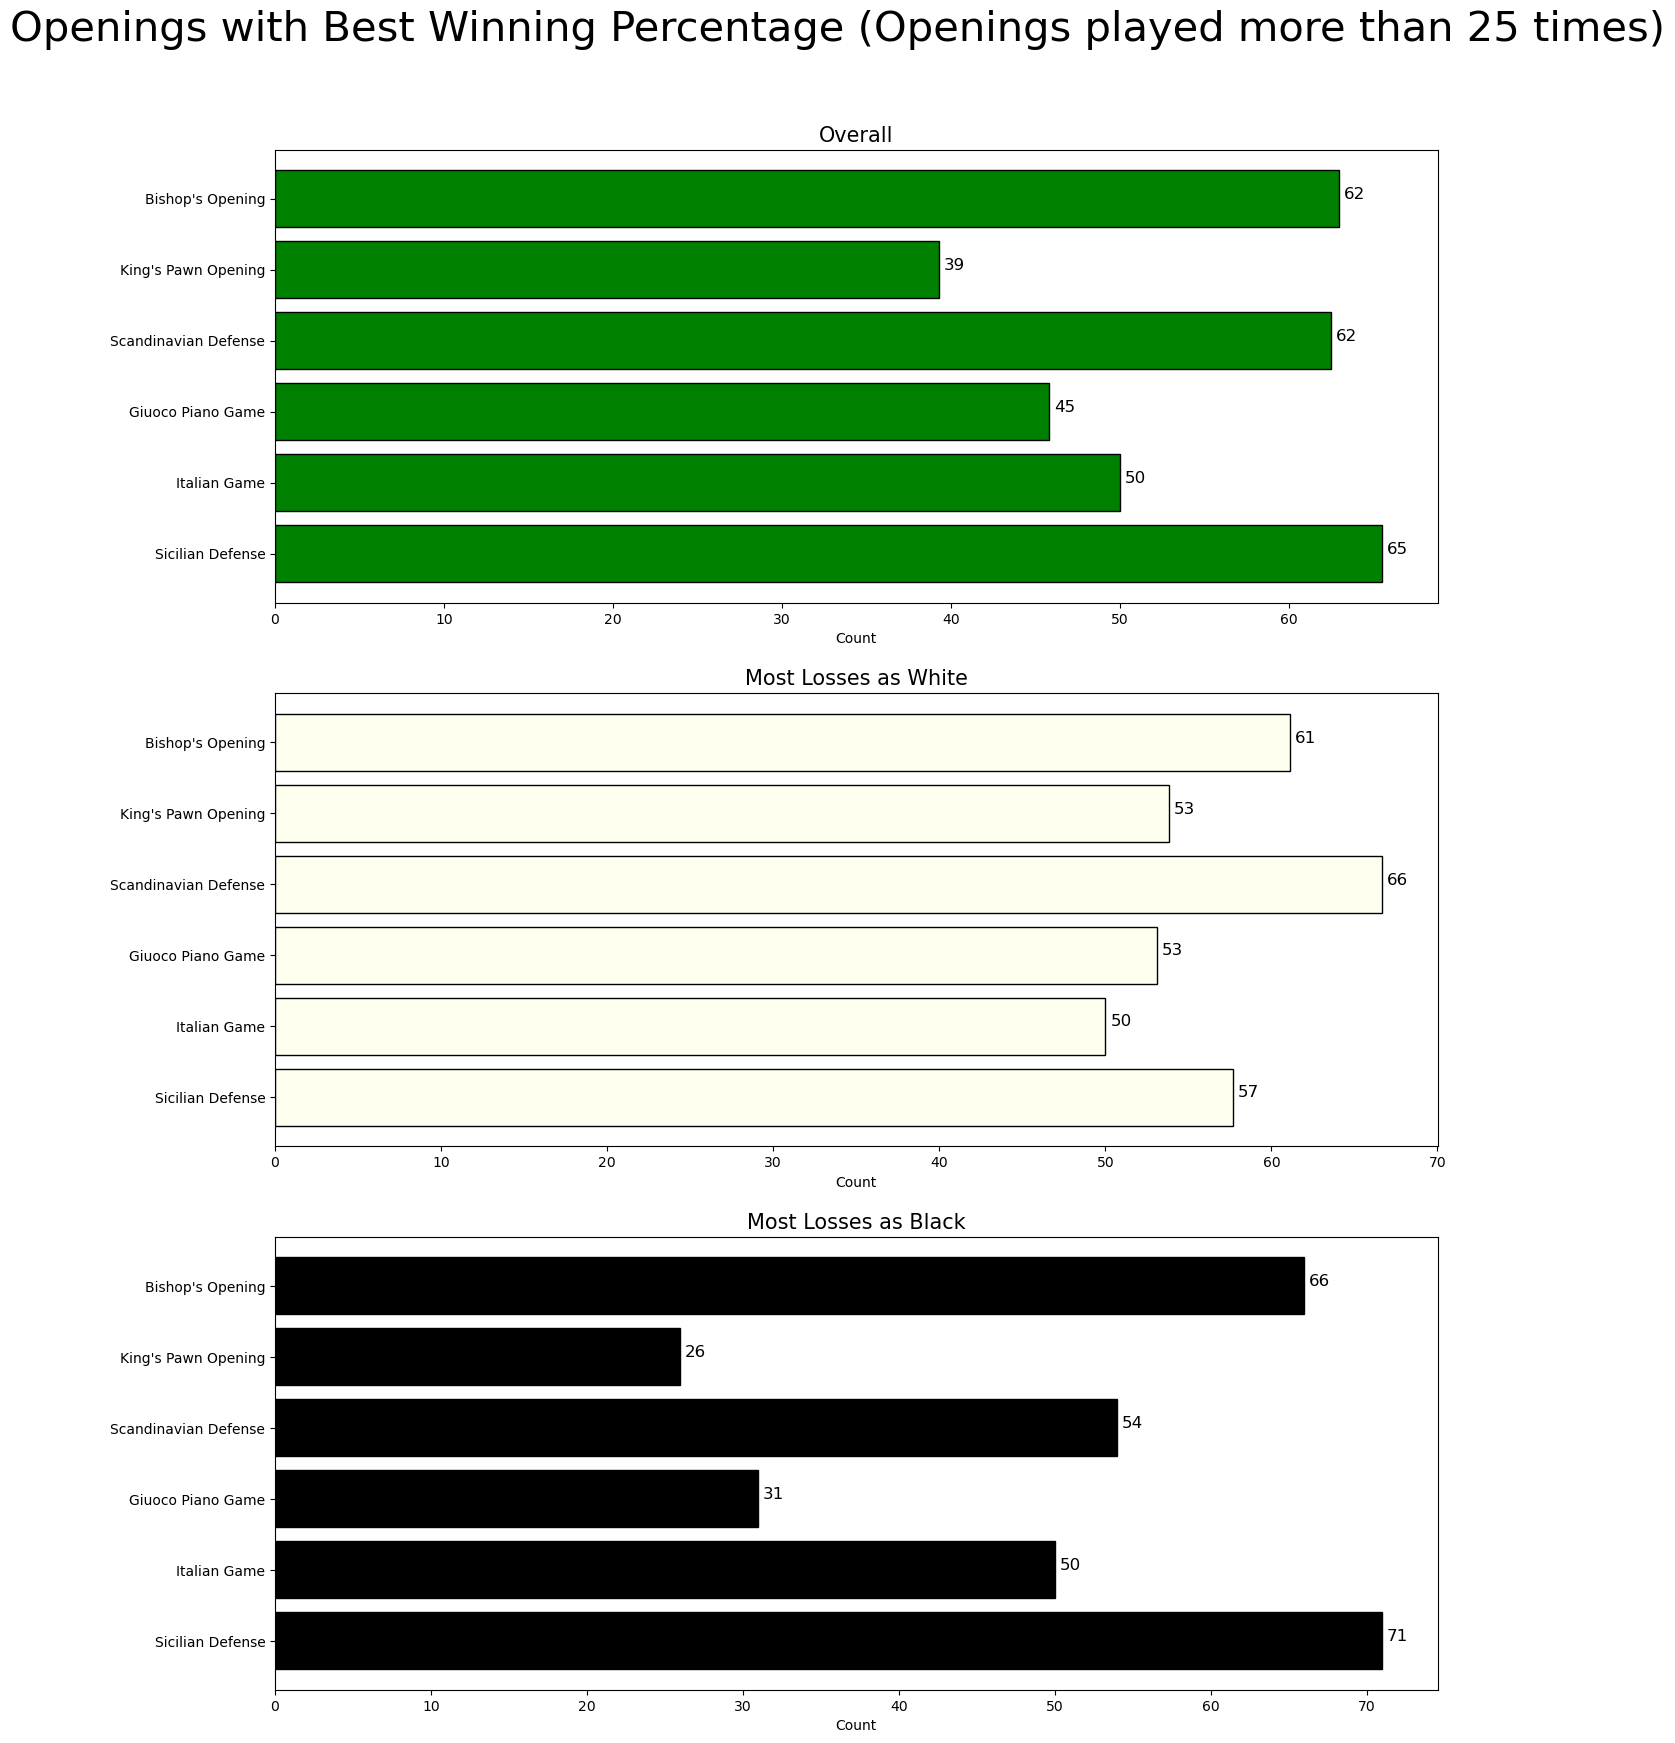

In [868]:
fig, ax = plt.subplots(3,1,figsize=(15,20))

fig.suptitle(f'Openings with Best Winning Percentage (Openings played more than {min_games_played} times)',
             fontsize=font_size_suptitle,y=0.95)


# Overall Graph

ax[0].set_title('Overall',fontsize=font_size_title)
bar_overall = ax[0].barh(best_opening['Opening'],best_opening['Win_percent'],label='Overall',
                        color='green',edgecolor='black')
ax[0].set_xlabel('Count')

for bar in bar_overall:
    width = bar.get_width()
    height = bar.get_height()
    ax[0].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    

# Graph for White
ax[1].set_title('Most Losses as White',fontsize=font_size_title)
bar_white = ax[1].barh(best_opening['Opening'],best_opening['Win_percent_white'],
                        color='#FFFFF0',edgecolor='black')
ax[1].set_xlabel('Count')

for bar in bar_white:
    width = bar.get_width()
    height = bar.get_height()
    ax[1].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    
    
# Graph for Black

ax[2].set_title('Most Losses as Black',fontsize=font_size_title)
bar_black = ax[2].barh(best_opening['Opening'],best_opening['Win_percent_black'],
                        color='black',edgecolor='black')
ax[2].set_xlabel('Count')

for bar in bar_black:
    width = bar.get_width()
    height = bar.get_height()
    ax[2].text(x=bar.get_width()+0.3,y=bar.get_y()+bar.get_height()/2,s=int(bar.get_width()),fontsize=font_size_graph)
    
    

# Miscellaneous  Analysis

In [869]:
table.head()

,Game_id,Time_format,Players,White,Black,My_rating,Opponent,Opponent_rating,Points,Result,By,Moves,Opening,Variation
0,80912631031,10 min,kana2704 (1422) Tanzeel06 (1461),kana2704,Tanzeel06,1461,kana2704,1422,0-1,Won,by resignation,43,Nimzowitsch-Larsen Attack,Modern Variation
1,80771638629,10 min,Tanzeel06 (1454) gilsonbortolin (1455),Tanzeel06,gilsonbortolin,1454,gilsonbortolin,1455,0-1,Lost,by resignation,31,Sicilian Defense,Old Sicilian Variation
2,80770945147,10 min,Tanzeel06 (1462) YonT83 (1494),Tanzeel06,YonT83,1462,YonT83,1494,0-1,Lost,by resignation,51,Giuoco Piano Game,Four Knights Game
3,80730671975,10 min,kishna456 (1417) Tanzeel06 (1470),kishna456,Tanzeel06,1470,kishna456,1417,0-1,Won,by resignation,27,Sicilian Defense,"Open, Pelikán and Sveshnikov, Schlechter Vari..."
4,80654016843,10 min,IAS_Sarthak (1439) Tanzeel06 (1454),IAS_Sarthak,Tanzeel06,1454,IAS_Sarthak,1439,1-0,Lost,by resignation,19,Closed Sicilian Defense,Grand Prix Attack


In [872]:
# Maximum Rating faced

table[table['Opponent_rating']==table['Opponent_rating'].max()]

,Game_id,Time_format,Players,White,Black,My_rating,Opponent,Opponent_rating,Points,Result,By,Moves,Opening,Variation
20,80580091357,10 min,Tanzeel06 (1445) HaberKE (1538),Tanzeel06,HaberKE,1445,HaberKE,1538,0-1,Lost,by resignation,37,Italian Game,"Two Knights, Modern Bishop's Opening"


In [890]:
win_table = table[table['Result']=='Won']
loss_table = table[table['Result']=='Lost']

In [885]:
# Max rating faced and Won

win_table[win_table['Opponent_rating']==win_table['Opponent_rating'].max()]

,Game_id,Time_format,Players,White,Black,My_rating,Opponent,Opponent_rating,Points,Result,By,Moves,Opening,Variation
11,80637680553,10 min,FullerJr (1531) Tanzeel06 (1481),FullerJr,Tanzeel06,1481,FullerJr,1531,0-1,Won,by checkmate,36,Sicilian Defense,McDonnell Attack


In [886]:
# Min rating faced and Won

win_table[win_table['Opponent_rating']==win_table['Opponent_rating'].min()]

,Game_id,Time_format,Players,White,Black,My_rating,Opponent,Opponent_rating,Points,Result,By,Moves,Opening,Variation
476,67010534653,10 min,huza11fa (415) Tanzeel06 (1291),huza11fa,Tanzeel06,1291,huza11fa,415,0-1,Won,by resignation,25,Queen's Pawn Opening,Chigorin Variation


In [891]:
# Max rating faced and Lost

loss_table[loss_table['Opponent_rating']==loss_table['Opponent_rating'].max()]

,Game_id,Time_format,Players,White,Black,My_rating,Opponent,Opponent_rating,Points,Result,By,Moves,Opening,Variation
20,80580091357,10 min,Tanzeel06 (1445) HaberKE (1538),Tanzeel06,HaberKE,1445,HaberKE,1538,0-1,Lost,by resignation,37,Italian Game,"Two Knights, Modern Bishop's Opening"


In [892]:
# Min rating faced and Lost

loss_table[loss_table['Opponent_rating']==loss_table['Opponent_rating'].min()]

,Game_id,Time_format,Players,White,Black,My_rating,Opponent,Opponent_rating,Points,Result,By,Moves,Opening,Variation
161,77272820409,1|1,Tanzeel06 (349) tox19 (374),Tanzeel06,tox19,349,tox19,374,0-1,Lost,game abandoned,8,Scandinavian Defense,Mieses-Kotrč Variation


In [894]:
# Average Rating of Opponent:

table['Opponent_rating'].mean()

1287.256

In [896]:
# Average Rating of Opponent while Winnig

round(win_table['Opponent_rating'].mean(),2)

1278.59

In [897]:
# Average Rating of Opponent while Losing

round(loss_table['Opponent_rating'].mean(),2)

1294.74

In [899]:
# Average Rating of Opponent while Winnig

round(win_table['Opponent_rating'].median(),2)

1273.0

In [904]:
# Avergae Number of Moves

avg_moves = round(table['Moves'].mean(),2)
avg_moves

29.89

In [902]:
# Avergae Number of Moves while Winning

avg_moves_win = round(win_table['Moves'].mean(),2)
avg_moves_win

29.63

In [906]:
# Avergae Number of Moves while Losing

avg_moves_loss = round(loss_table['Moves'].mean(),2)
avg_moves_loss

29.47

In [905]:
# Maximum Number of Moves

max_moves = table['Moves'].max(),2
max_moves

97

In [908]:
# Maximum Number of Moves while Winning

max_moves_win = win_table['Moves'].max(),2
max_moves_win

84

In [909]:
# Maximum Number of Moves while Winning

max_moves_loss = loss_table['Moves'].max(),2
max_moves_loss

97

In [911]:
table[table['Moves']==max_moves_win]

,Game_id,Time_format,Players,White,Black,My_rating,Opponent,Opponent_rating,Points,Result,By,Moves,Opening,Variation
316,69092596561,10 min,Tanzeel06 (1319) cabromo (1273),Tanzeel06,cabromo,1319,cabromo,1273,1-0,Won,by checkmate,84,Giuoco Piano Game,Four Knights Game


In [912]:
table[table['Moves']==max_moves_loss]

,Game_id,Time_format,Players,White,Black,My_rating,Opponent,Opponent_rating,Points,Result,By,Moves,Opening,Variation
257,70353678651,10 min,KoNgelLay (1386) Tanzeel06 (1322),KoNgelLay,Tanzeel06,1322,KoNgelLay,1386,1-0,Lost,by checkmate,97,Ruy López Opening,Old Steinitz Defense
